<a href="https://colab.research.google.com/github/fshnkarimi/Labeling/blob/main/Buy%26Hold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def buy_and_hold(df, InitialCapital):
    
    capital = InitialCapital
    stock = 0
    old_trend = new_trend = df.Label[0]
    final_capitals = []

    for i in range(df.Label.count()):
        new_trend = df.Label[i]
        
        if new_trend == 1 and capital != 0:
          # Buy
          stock = capital / df.Price[i]
          capital = 0
          df['Trade Signal'][i] = 'Buy'
          df['Number of Shares'][i] = "{0:0.2f}".format(stock)

        elif new_trend != old_trend and new_trend == 0:
            # sell
            if stock != 0:
                capital = stock * df.Price[i]
                stock = 0
                df['Trade Signal'][i] = 'Sell'
                df['Number of Shares'][i] = '0'
        else:
            if i != 0:
                df['Number of Shares'][i] = df['Number of Shares'][i-1] 

        if capital != 0:
            final_capitals.append(capital)
        else:
            final_capitals.append(stock * df.Price[i])

        old_trend = df.Label[i]
    
    df = df.assign(FinalCapital=pd.Series(final_capitals))
    return df

In [ ]:
def ROR(df, InitialCapital):
    ROR_list = []
    for capital in df.FinalCapital:
        ror = (df.FinalCapital - InitialCapital)/ InitialCapital * 100
        ROR_list.append(ror)
    df = df.assign(ROR=pd.Series(df.FinalCapital - InitialCapital)/ InitialCapital * 100)
    return df

In [ ]:
def DD(df):
    max_ror = max(df.ROR)
    DD_list = []
    for ror in df.ROR:
      DD_list.append(max_ror - ror)
    df = df.assign(DD=pd.Series(DD_list))
    return df

In [ ]:
# Sharpe Ratio
def sharpe_ratio(df):
    R = df.ROR[-1:].values[0]
    sr = R / df.ROR.std()
    return sr

In [ ]:
def metrics(df, InitialCapital):
    df = buy_and_hold(df_new, InitialCapital)
    df = ROR(df, InitialCapital)
    df = DD(df)
    MDD = max(df.DD)
    sr = sharpe_ratio(df)
    print(f"Sharpe Ratio = {sr} \n")
    print(f"MDD = {MDD} \n")
    return df

In [ ]:
InitialCapital = 10e6
InitialCapital

10000000.0

# Tesla

## LSTM

In [ ]:
df = pd.read_csv('Tesla_lstm.csv')

data = {'Date': df['Date'], 'Price': df['Close/Last'],
        'Label': df['labels'], 'Trade Signal': '', 'Number of Shares': '0'}
df_new = pd.DataFrame(data)

tesla_lstm_metrics = metrics(df_new, InitialCapital)
tesla_lstm_metrics.to_csv('Tesla_lstm_metrics.csv')
tesla_lstm_metrics

Sharpe Ratio = -0.34001063747069965 

MDD = 67.29102965570883 



,Date,Price,Label,Trade Signal,Number of Shares,FinalCapital,ROR,DD
0,05/26/2016,45.024,1,Buy,222103.77,1.000000e+07,0.000000,42.295151
1,05/27/2016,44.608,1,,222103.77,9.907605e+06,-0.923952,43.219103
2,05/31/2016,44.646,1,,222103.77,9.916045e+06,-0.839552,43.134703
3,06/01/2016,43.912,1,,222103.77,9.753021e+06,-2.469794,44.764945
4,06/02/2016,43.792,1,,222103.77,9.726368e+06,-2.736318,45.031470
...,...,...,...,...,...,...,...,...
785,07/11/2019,47.720,1,,185523.85,8.853198e+06,-11.468021,53.763172
786,07/12/2019,49.016,1,,185523.85,9.093637e+06,-9.063632,51.358783
787,07/15/2019,50.700,1,,185523.85,9.406059e+06,-5.939410,48.234561
788,07/16/2019,50.476,1,,185523.85,9.364502e+06,-6.354983,48.650135


## LSTM_beta

In [ ]:
df = pd.read_csv('Tesla_lstm_beta.csv')

data = {'Date': df['Date'], 'Price': df['Close/Last'],
        'Label': df['labels'], 'Trade Signal': '', 'Number of Shares': '0'}
df_new = pd.DataFrame(data)

Tesla_lstm_beta_metrics = metrics(df_new, InitialCapital)
Tesla_lstm_beta_metrics.to_csv('Tesla_lstm_beta_metrics.csv')
Tesla_lstm_beta_metrics

Sharpe Ratio = -1.305332521559509 

MDD = 109.32821004202657 



,Date,Price,Label,Trade Signal,Number of Shares,FinalCapital,ROR,DD
0,07/14/2016,44.306,1,Buy,225703.07,1.000000e+07,0.000000,56.920981
1,07/15/2016,44.080,1,,225703.07,9.948991e+06,-0.510089,57.431070
2,07/18/2016,45.250,1,,225703.07,1.021306e+07,2.130637,54.790344
3,07/19/2016,45.052,1,,225703.07,1.016837e+07,1.683745,55.237236
4,07/20/2016,45.672,1,,225703.07,1.030831e+07,3.083104,53.837877
...,...,...,...,...,...,...,...,...
752,07/11/2019,47.720,1,,121045.76,5.776304e+06,-42.236965,99.157945
753,07/12/2019,49.016,1,,121045.76,5.933179e+06,-40.668211,97.589192
754,07/15/2019,50.700,1,,121045.76,6.137020e+06,-38.629801,95.550782
755,07/16/2019,50.476,1,,121045.76,6.109906e+06,-38.900943,95.821924


## GRU

In [ ]:
df = pd.read_csv('Tesla_gru.csv')

data = {'Date': df['Date'], 'Price': df['Close/Last'],
        'Label': df['labels'], 'Trade Signal': '', 'Number of Shares': '0'}
df_new = pd.DataFrame(data)

Tesla_gru_metrics = metrics(df_new, InitialCapital)
Tesla_gru_metrics.to_csv('Tesla_gru_metrics.csv')
Tesla_gru_metrics

Sharpe Ratio = -0.18828047111628085 

MDD = 84.31202015453272 



,Date,Price,Label,Trade Signal,Number of Shares,FinalCapital,ROR,DD
0,05/26/2016,45.024,1,Buy,222103.77,1.000000e+07,0.000000,58.332104
1,05/27/2016,44.608,1,,222103.77,9.907605e+06,-0.923952,59.256056
2,05/31/2016,44.646,1,,222103.77,9.916045e+06,-0.839552,59.171657
3,06/01/2016,43.912,1,,222103.77,9.753021e+06,-2.469794,60.801898
4,06/02/2016,43.792,1,,222103.77,9.726368e+06,-2.736318,61.068423
...,...,...,...,...,...,...,...,...
785,07/11/2019,47.720,1,,188260.04,8.983769e+06,-10.162307,68.494411
786,07/12/2019,49.016,1,,188260.04,9.227754e+06,-7.722457,66.054561
787,07/15/2019,50.700,1,,188260.04,9.544784e+06,-4.552157,62.884262
788,07/16/2019,50.476,1,,188260.04,9.502614e+06,-4.973860,63.305964


## GRU_beta


In [ ]:
df = pd.read_csv('Tesla_gru_beta.csv')

data = {'Date': df['Date'], 'Price': df['Close/Last'],
        'Label': df['labels'], 'Trade Signal': '', 'Number of Shares': '0'}
df_new = pd.DataFrame(data)

Tesla_gru_beta_metrics = metrics(df_new, InitialCapital)
Tesla_gru_beta_metrics.to_csv('Tesla_gru_beta_metrics.csv')
Tesla_gru_beta_metrics

Sharpe Ratio = -1.290578842346147 

MDD = 114.87319406649497 



,Date,Price,Label,Trade Signal,Number of Shares,FinalCapital,ROR,DD
0,07/14/2016,44.306,1,Buy,225703.07,1.000000e+07,0.000000,66.440555
1,07/15/2016,44.080,1,,225703.07,9.948991e+06,-0.510089,66.950644
2,07/18/2016,45.250,1,,225703.07,1.021306e+07,2.130637,64.309918
3,07/19/2016,45.052,1,,225703.07,1.016837e+07,1.683745,64.756811
4,07/20/2016,45.672,1,,225703.07,1.030831e+07,3.083104,63.357452
...,...,...,...,...,...,...,...,...
752,07/11/2019,47.720,1,,123213.61,5.879754e+06,-41.202464,107.643019
753,07/12/2019,49.016,1,,123213.61,6.039438e+06,-39.605615,106.046171
754,07/15/2019,50.700,1,,123213.61,6.246930e+06,-37.530698,103.971254
755,07/16/2019,50.476,1,,123213.61,6.219330e+06,-37.806697,104.247252


# China_001

## LSTM

In [ ]:
df = pd.read_csv('lstm_001.csv')

data = {'Date': df['DATE'], 'Price': df['closingprice'],
        'Label': df['labels'], 'Trade Signal': '', 'Number of Shares': '0'}
df_new = pd.DataFrame(data)

metrics_ = metrics(df_new, InitialCapital)
metrics_.to_csv('001_lstm_metrics.csv')
metrics_

Sharpe Ratio = 1.8237765427702168 

MDD = 116.35316328217817 



,Date,Price,Label,Trade Signal,Number of Shares,FinalCapital,ROR,DD
0,2011-10-31,2468.25,1,Buy,4051.45,1.000000e+07,0.000000,110.488438
1,2011-11-01,2470.02,1,,4051.45,1.000717e+07,0.071711,110.416727
2,2011-11-02,2504.11,1,,4051.45,1.014529e+07,1.452851,109.035586
3,2011-11-03,2508.09,1,,4051.45,1.016141e+07,1.614099,108.874339
4,2011-11-04,2528.29,1,,4051.45,1.024325e+07,2.432493,108.055945
...,...,...,...,...,...,...,...,...
1685,2018-09-28,2821.35,1,,5701.72,1.608656e+07,60.865596,49.622842
1686,2018-10-08,2716.51,1,,5701.72,1.548879e+07,54.887908,55.600530
1687,2018-10-09,2721.01,0,Sell,0,1.551445e+07,55.144485,55.343952
1688,2018-10-10,2725.84,0,,0,1.551445e+07,55.144485,55.343952


## LSTM_beta

In [ ]:
df = pd.read_csv('lstm_beta_001.csv')

data = {'Date': df['DATE'], 'Price': df['closingprice'],
        'Label': df['labels'], 'Trade Signal': '', 'Number of Shares': '0'}
df_new = pd.DataFrame(data)

metrics_ = metrics(df_new, InitialCapital)
metrics_.to_csv('001_lstm_beta_metrics.csv')
metrics_

Sharpe Ratio = 1.2205923167710364 

MDD = 111.2642665877932 



,Date,Price,Label,Trade Signal,Number of Shares,FinalCapital,ROR,DD
0,2011-12-15,2180.89,0,,0,1.000000e+07,0.000000,83.757860
1,2011-12-16,2224.84,0,,0,1.000000e+07,0.000000,83.757860
2,2011-12-19,2218.24,0,,0,1.000000e+07,0.000000,83.757860
3,2011-12-20,2215.92,0,,0,1.000000e+07,0.000000,83.757860
4,2011-12-21,2191.14,0,,0,1.000000e+07,0.000000,83.757860
...,...,...,...,...,...,...,...,...
1652,2018-09-28,2821.35,1,,4893.68,1.380678e+07,38.067819,45.690041
1653,2018-10-08,2716.51,0,Sell,0,1.329373e+07,32.937286,50.820574
1654,2018-10-09,2721.01,0,,0,1.329373e+07,32.937286,50.820574
1655,2018-10-10,2725.84,0,,0,1.329373e+07,32.937286,50.820574


## GRU

In [ ]:
df = pd.read_csv('gru_001.csv')

data = {'Date': df['DATE'], 'Price': df['closingprice'],
        'Label': df['labels'], 'Trade Signal': '', 'Number of Shares': '0'}
df_new = pd.DataFrame(data)

metrics_ = metrics(df_new, InitialCapital)
metrics_.to_csv('001_gru_metrics.csv')
metrics_

Sharpe Ratio = 1.5513745946646078 

MDD = 136.35792748780406 



,Date,Price,Label,Trade Signal,Number of Shares,FinalCapital,ROR,DD
0,2011-10-31,2468.25,1,Buy,4051.45,1.000000e+07,0.000000,129.598515
1,2011-11-01,2470.02,1,,4051.45,1.000717e+07,0.071711,129.526804
2,2011-11-02,2504.11,1,,4051.45,1.014529e+07,1.452851,128.145663
3,2011-11-03,2508.09,1,,4051.45,1.016141e+07,1.614099,127.984416
4,2011-11-04,2528.29,1,,4051.45,1.024325e+07,2.432493,127.166022
...,...,...,...,...,...,...,...,...
1685,2018-09-28,2821.35,1,,6123.10,1.727542e+07,72.754211,56.844304
1686,2018-10-08,2716.51,1,,6123.10,1.663347e+07,66.334748,63.263766
1687,2018-10-09,2721.01,1,,6123.10,1.666103e+07,66.610288,62.988227
1688,2018-10-10,2725.84,1,,6123.10,1.669060e+07,66.906034,62.692481


## GRU_beta

In [ ]:
df = pd.read_csv('gru_beta_001.csv')

data = {'Date': df['DATE'], 'Price': df['closingprice'],
        'Label': df['labels'], 'Trade Signal': '', 'Number of Shares': '0'}
df_new = pd.DataFrame(data)

metrics_ = metrics(df_new, InitialCapital)
metrics_.to_csv('001_gru_beta_metrics.csv')
metrics_

Sharpe Ratio = 1.6037816358601409 

MDD = 112.9492806817018 



,Date,Price,Label,Trade Signal,Number of Shares,FinalCapital,ROR,DD
0,2011-12-15,2180.89,0,,0,1.000000e+07,0.000000,103.732527
1,2011-12-16,2224.84,0,,0,1.000000e+07,0.000000,103.732527
2,2011-12-19,2218.24,0,,0,1.000000e+07,0.000000,103.732527
3,2011-12-20,2215.92,0,,0,1.000000e+07,0.000000,103.732527
4,2011-12-21,2191.14,0,,0,1.000000e+07,0.000000,103.732527
...,...,...,...,...,...,...,...,...
1652,2018-09-28,2821.35,1,,5904.10,1.665755e+07,66.575456,37.157071
1653,2018-10-08,2716.51,0,Sell,0,1.603856e+07,60.385592,43.346935
1654,2018-10-09,2721.01,0,,0,1.603856e+07,60.385592,43.346935
1655,2018-10-10,2725.84,0,,0,1.603856e+07,60.385592,43.346935


## SVM

In [ ]:
df = pd.read_csv('svm_001.csv')

data = {'Date': df['DATE'], 'Price': df['closingprice'],
        'Label': df['labels'], 'Trade Signal': '', 'Number of Shares': '0'}
df_new = pd.DataFrame(data)

metrics_ = metrics(df_new, InitialCapital)
metrics_.to_csv('001_svm_metrics.csv')
metrics_

Sharpe Ratio = 2.008094490741153 

MDD = 137.8203941588056 



,Date,Price,Label,Trade Signal,Number of Shares,FinalCapital,ROR,DD
0,2011-10-31,2468.25,1,Buy,4051.45,1.000000e+07,0.000000,129.844448
1,2011-11-01,2470.02,1,,4051.45,1.000717e+07,0.071711,129.772737
2,2011-11-02,2504.11,1,,4051.45,1.014529e+07,1.452851,128.391597
3,2011-11-03,2508.09,1,,4051.45,1.016141e+07,1.614099,128.230349
4,2011-11-04,2528.29,1,,4051.45,1.024325e+07,2.432493,127.411955
...,...,...,...,...,...,...,...,...
1685,2018-09-28,2821.35,1,,7134.02,2.012756e+07,101.275562,28.568886
1686,2018-10-08,2716.51,1,,7134.02,1.937963e+07,93.796259,36.048189
1687,2018-10-09,2721.01,1,,7134.02,1.941173e+07,94.117290,35.727158
1688,2018-10-10,2725.84,0,Sell,0,1.944619e+07,94.461863,35.382585


## SVM_beta


In [ ]:
df = pd.read_csv('svm_beta_001.csv')

data = {'Date': df['DATE'], 'Price': df['closingprice'],
        'Label': df['labels'], 'Trade Signal': '', 'Number of Shares': '0'}
df_new = pd.DataFrame(data)

metrics_ = metrics(df_new, InitialCapital)
metrics_.to_csv('001_svm_beta_metrics.csv')
metrics_

Sharpe Ratio = 1.5766596078058162 

MDD = 100.8300252248614 



,Date,Price,Label,Trade Signal,Number of Shares,FinalCapital,ROR,DD
0,2011-12-15,2180.89,0,,0,1.000000e+07,0.000000,83.334653
1,2011-12-16,2224.84,0,,0,1.000000e+07,0.000000,83.334653
2,2011-12-19,2218.24,0,,0,1.000000e+07,0.000000,83.334653
3,2011-12-20,2215.92,0,,0,1.000000e+07,0.000000,83.334653
4,2011-12-21,2191.14,0,,0,1.000000e+07,0.000000,83.334653
...,...,...,...,...,...,...,...,...
1652,2018-09-28,2821.35,1,,5743.37,1.620406e+07,62.040623,21.294030
1653,2018-10-08,2716.51,0,Sell,0,1.560193e+07,56.019272,27.315381
1654,2018-10-09,2721.01,0,,0,1.560193e+07,56.019272,27.315381
1655,2018-10-10,2725.84,0,,0,1.560193e+07,56.019272,27.315381


## XGBoost

In [ ]:
df = pd.read_csv('xgboost_001.csv')

data = {'Date': df['DATE'], 'Price': df['closingprice'],
        'Label': df['labels'], 'Trade Signal': '', 'Number of Shares': '0'}
df_new = pd.DataFrame(data)

metrics_ = metrics(df_new, InitialCapital)
metrics_.to_csv('001_xgboost_metrics.csv')
metrics_

Sharpe Ratio = 1.669834474858571 

MDD = 84.75963455486735 



,Date,Price,Label,Trade Signal,Number of Shares,FinalCapital,ROR,DD
0,2011-10-31,2468.25,1,Buy,4051.45,1.000000e+07,0.000000,73.015204
1,2011-11-01,2470.02,1,,4051.45,1.000717e+07,0.071711,72.943493
2,2011-11-02,2504.11,1,,4051.45,1.014529e+07,1.452851,71.562353
3,2011-11-03,2508.09,1,,4051.45,1.016141e+07,1.614099,71.401105
4,2011-11-04,2528.29,1,,4051.45,1.024325e+07,2.432493,70.582711
...,...,...,...,...,...,...,...,...
1685,2018-09-28,2821.35,1,,5504.42,1.552989e+07,55.298851,17.716353
1686,2018-10-08,2716.51,0,Sell,0,1.495280e+07,49.528021,23.487183
1687,2018-10-09,2721.01,0,,0,1.495280e+07,49.528021,23.487183
1688,2018-10-10,2725.84,0,,0,1.495280e+07,49.528021,23.487183


## XGBoost_beta

In [ ]:
df = pd.read_csv('xgboost_beta_001.csv')

data = {'Date': df['DATE'], 'Price': df['closingprice'],
        'Label': df['labels'], 'Trade Signal': '', 'Number of Shares': '0'}
df_new = pd.DataFrame(data)

metrics_ = metrics(df_new, InitialCapital)
metrics_.to_csv('001_xgboost_beta_metrics.csv')
metrics_

Sharpe Ratio = 1.43190441113367 

MDD = 105.79210039407826 



,Date,Price,Label,Trade Signal,Number of Shares,FinalCapital,ROR,DD
0,2011-12-15,2180.89,0,,0,1.000000e+07,0.000000,88.225437
1,2011-12-16,2224.84,0,,0,1.000000e+07,0.000000,88.225437
2,2011-12-19,2218.24,0,,0,1.000000e+07,0.000000,88.225437
3,2011-12-20,2215.92,0,,0,1.000000e+07,0.000000,88.225437
4,2011-12-21,2191.14,0,,0,1.000000e+07,0.000000,88.225437
...,...,...,...,...,...,...,...,...
1652,2018-09-28,2821.35,1,,5517.58,1.556702e+07,55.670157,32.555280
1653,2018-10-08,2716.51,0,Sell,0,1.498855e+07,49.885529,38.339907
1654,2018-10-09,2721.01,0,,0,1.498855e+07,49.885529,38.339907
1655,2018-10-10,2725.84,0,,0,1.498855e+07,49.885529,38.339907


# ETH

## LSTM

In [ ]:
df.head()

,Unnamed: 0,index,Date,Price,Open,High,Low,Vol.,Change %,labels
0,810,682,"Sep 23, 2019",201.18,211.16,211.76,199.82,9.65M,-4.71%,1
1,811,681,"Sep 24, 2019",166.29,201.22,202.97,164.78,19.02M,-17.34%,0
2,812,680,"Sep 25, 2019",168.92,166.29,174.26,162.12,13.88M,1.58%,0
3,813,679,"Sep 26, 2019",164.56,168.93,169.81,153.17,11.97M,-2.58%,0
4,814,678,"Sep 27, 2019",173.19,164.58,175.65,161.32,10.94M,5.24%,0


In [ ]:
df = pd.read_csv('lstm_eth.csv')

data = {'Date': df['Date'], 'Price': df['close/price'],
        'Label': df['labels'], 'Trade Signal': '', 'Number of Shares': '0'}
df_new = pd.DataFrame(data)

metrics_ = metrics(df_new, InitialCapital)
metrics_.to_csv('eth_lstm_metrics.csv')
metrics_

Sharpe Ratio = 3.336297201024534 

MDD = 298.43969689175935 



,Date,Price,Label,Trade Signal,Number of Shares,FinalCapital,ROR,DD
0,"Sep 23, 2019",201.18,1,Buy,49706.73,1.000000e+07,0.000000,270.670792
1,"Sep 24, 2019",166.29,0,Sell,0,8.265732e+06,-17.342678,288.013470
2,"Sep 25, 2019",168.92,0,,0,8.265732e+06,-17.342678,288.013470
3,"Sep 26, 2019",164.56,0,,0,8.265732e+06,-17.342678,288.013470
4,"Sep 27, 2019",173.19,0,,0,8.265732e+06,-17.342678,288.013470
...,...,...,...,...,...,...,...,...
535,"Mar 11, 2021",1825.79,1,,18137.49,3.311524e+07,231.152441,39.518350
536,"Mar 12, 2021",1766.90,1,,18137.49,3.204713e+07,220.471274,50.199517
537,"Mar 13, 2021",1921.13,1,,18137.49,3.484447e+07,248.444722,22.226069
538,"Mar 14, 2021",1849.06,1,,18137.49,3.353730e+07,235.373035,35.297757


## LSTM_beta

In [ ]:
df = pd.read_csv('lstm_beta_eth.csv')

data = {'Date': df['DATE'], 'Price': df['closingprice'],
        'Label': df['labels'], 'Trade Signal': '', 'Number of Shares': '0'}
df_new = pd.DataFrame(data)

metrics_ = metrics(df_new, InitialCapital)
metrics_.to_csv('eth_lstm_beta_metrics.csv')
metrics_

# Visualization

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## china_001

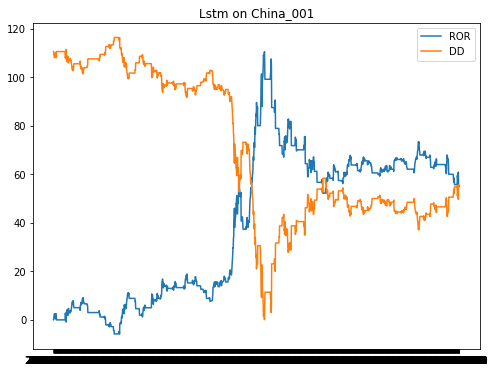

In [17]:
# lstm
df = pd.read_csv("001_lstm_metrics.csv")
plt.figure(figsize=(8, 6))
plt.plot(df.Date, df.ROR, label = "ROR")
plt.plot(df.Date, df.DD, label = "DD")
plt.title('Lstm on China_001')
plt.legend()
plt.show()

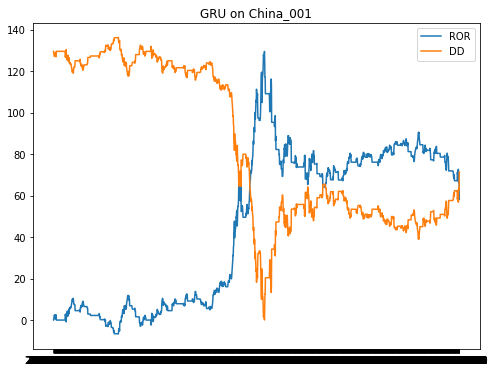

In [18]:
# gru
df = pd.read_csv("001_gru_metrics.csv")
plt.figure(figsize=(8, 6))
plt.plot(df.Date, df.ROR, label = "ROR")
plt.plot(df.Date, df.DD, label = "DD")
plt.title('GRU on China_001')
plt.legend()
plt.show()

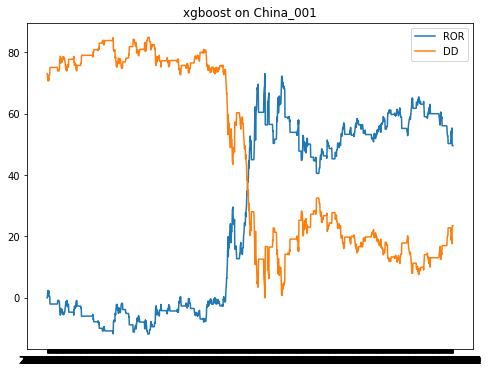

In [19]:
# xgboost
df = pd.read_csv("001_xgboost_metrics.csv")
plt.figure(figsize=(8, 6))
plt.plot(df.Date, df.ROR, label = "ROR")
plt.plot(df.Date, df.DD, label = "DD")
plt.title('xgboost on China_001')
plt.legend()
plt.show()

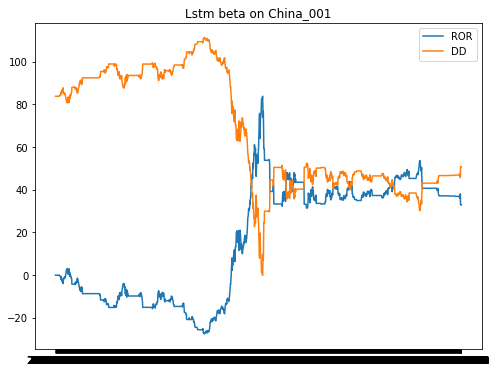

In [20]:
# lstm beta
df = pd.read_csv("001_lstm_beta_metrics.csv")
plt.figure(figsize=(8, 6))
plt.plot(df.Date, df.ROR, label = "ROR")
plt.plot(df.Date, df.DD, label = "DD")
plt.title('Lstm beta on China_001')
plt.legend()
plt.show()

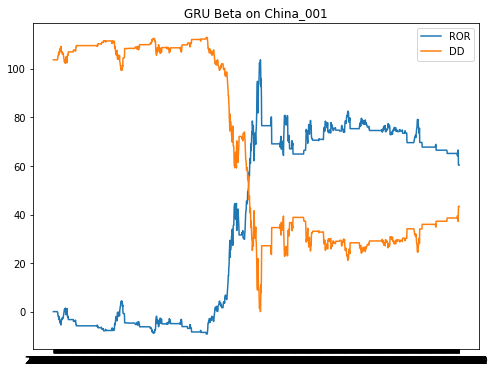

In [15]:
# gru beta
df = pd.read_csv("001_gru_beta_metrics.csv")
plt.figure(figsize=(8, 6))
plt.plot(df.Date, df.ROR, label = "ROR")
plt.plot(df.Date, df.DD, label = "DD")
plt.title('GRU Beta on China_001')
plt.legend()
plt.show()

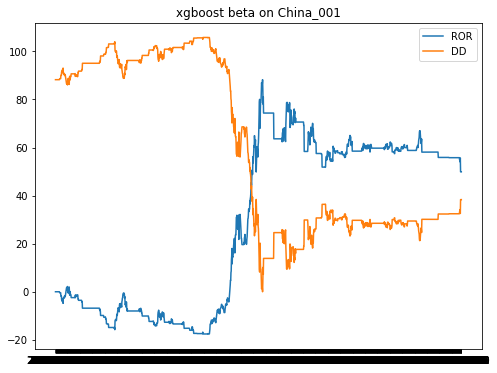

In [21]:
# xgboost beta
df = pd.read_csv("001_xgboost_beta_metrics.csv")
plt.figure(figsize=(8, 6))
plt.plot(df.Date, df.ROR, label = "ROR")
plt.plot(df.Date, df.DD, label = "DD")
plt.title('xgboost beta on China_001')
plt.legend()
plt.show()

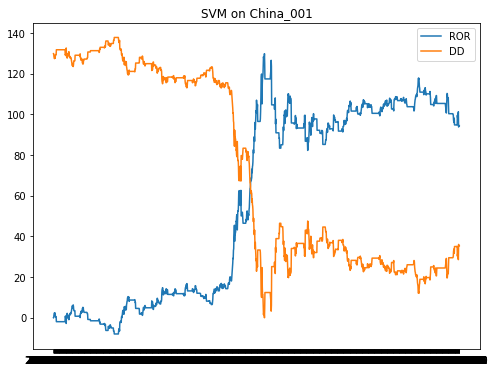

In [22]:
# svm
df = pd.read_csv("001_svm_metrics.csv")
plt.figure(figsize=(8, 6))
plt.plot(df.Date, df.ROR, label = "ROR")
plt.plot(df.Date, df.DD, label = "DD")
plt.title('SVM on China_001')
plt.legend()
plt.show()

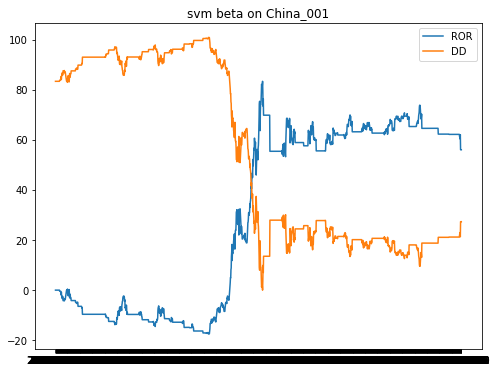

In [23]:
# svm beta
df = pd.read_csv("001_svm_beta_metrics.csv")
plt.figure(figsize=(8, 6))
plt.plot(df.Date, df.ROR, label = "ROR")
plt.plot(df.Date, df.DD, label = "DD")
plt.title('svm beta on China_001')
plt.legend()
plt.show()

## ETH

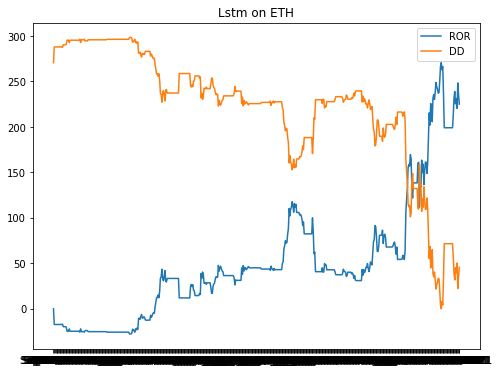

In [24]:
# lstm
df = pd.read_csv("eth_lstm_metrics.csv")
plt.figure(figsize=(8, 6))
plt.plot(df.Date, df.ROR, label = "ROR")
plt.plot(df.Date, df.DD, label = "DD")
plt.title('Lstm on ETH')
plt.legend()
plt.show()

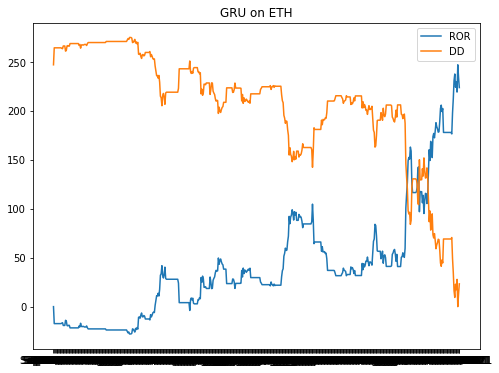

In [25]:
# gru
df = pd.read_csv("eth_gru_metrics.csv")
plt.figure(figsize=(8, 6))
plt.plot(df.Date, df.ROR, label = "ROR")
plt.plot(df.Date, df.DD, label = "DD")
plt.title('GRU on ETH')
plt.legend()
plt.show()

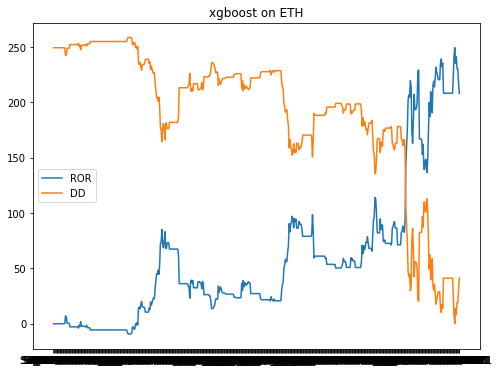

In [26]:
# xgboost
df = pd.read_csv("eth_xgboost_metrics.csv")
plt.figure(figsize=(8, 6))
plt.plot(df.Date, df.ROR, label = "ROR")
plt.plot(df.Date, df.DD, label = "DD")
plt.title('xgboost on ETH')
plt.legend()
plt.show()

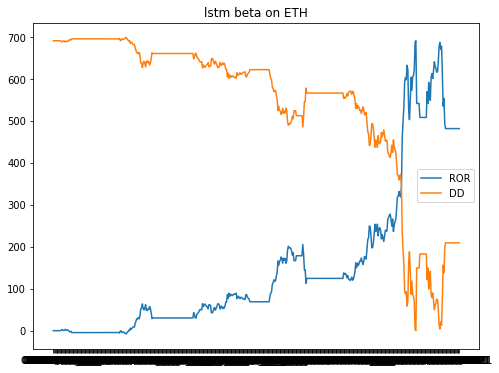

In [27]:
# lstm beta
df = pd.read_csv("eth_lstm_beta_metrics.csv")
plt.figure(figsize=(8, 6))
plt.plot(df.Date, df.ROR, label = "ROR")
plt.plot(df.Date, df.DD, label = "DD")
plt.title('lstm beta on ETH')
plt.legend()
plt.show()

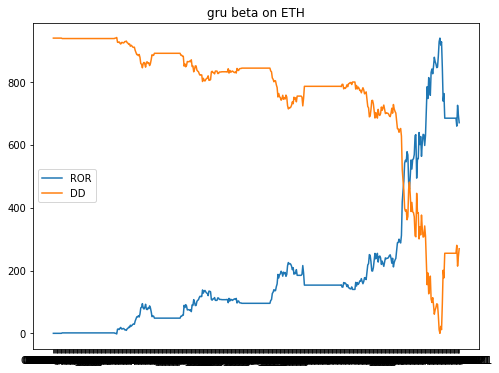

In [28]:
# gru beta
df = pd.read_csv("eth_gru_beta_metrics.csv")
plt.figure(figsize=(8, 6))
plt.plot(df.Date, df.ROR, label = "ROR")
plt.plot(df.Date, df.DD, label = "DD")
plt.title('gru beta on ETH')
plt.legend()
plt.show()

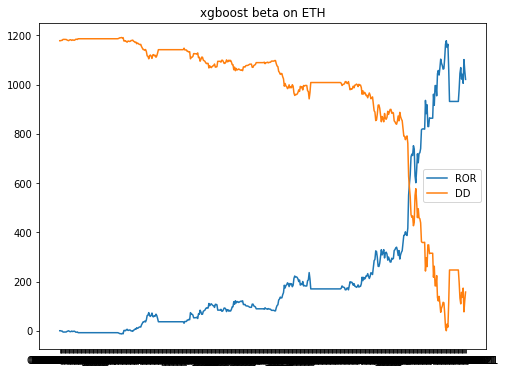

In [29]:
# xgboost beta
df = pd.read_csv("eth_xgboost_beta_metrics.csv")
plt.figure(figsize=(8, 6))
plt.plot(df.Date, df.ROR, label = "ROR")
plt.plot(df.Date, df.DD, label = "DD")
plt.title('xgboost beta on ETH')
plt.legend()
plt.show()

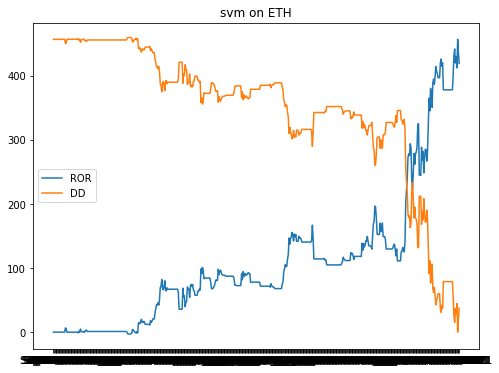

In [30]:
# svm
df = pd.read_csv("eth_svm_metrics.csv")
plt.figure(figsize=(8, 6))
plt.plot(df.Date, df.ROR, label = "ROR")
plt.plot(df.Date, df.DD, label = "DD")
plt.title('svm on ETH')
plt.legend()
plt.show()

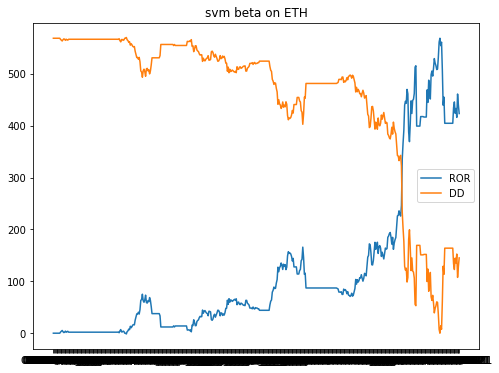

In [31]:
# svm beta
df = pd.read_csv("eth_svm_beta_metrics.csv")
plt.figure(figsize=(8, 6))
plt.plot(df.Date, df.ROR, label = "ROR")
plt.plot(df.Date, df.DD, label = "DD")
plt.title('svm beta on ETH')
plt.legend()
plt.show()